<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/knn/KNN_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('titanic_train.csv')

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Information
- Embarked implies where the traveler mounted from. There are three possible values for Embark Southampton, Cherbourg, and Queenstown.
- SibSp is the number of siblings or spouse of a person onboard
- Parch is the feature contained the number of parents or children each passenger was touring with.

# Checking number of passenger died

In [25]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [26]:
data.drop(['PassengerId', 'Name', "Ticket", "Cabin"], axis=1, inplace=True)

In [27]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [28]:
data.fillna(value={'Age': data['Age'].mean()}, inplace=True)

In [29]:
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# Creating Dummy Variables
- Dropping Female column, only male column can detect
- Dropping first column to avoid multicollinearity in embark

In [31]:
sex = pd.get_dummies(data['Sex'], drop_first=True,dtype=int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [32]:
embark = pd.get_dummies(data['Embarked'], drop_first=True,dtype=int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [33]:
data = pd.concat([data, sex, embark], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [34]:
data = data.drop(['Sex', 'Embarked'], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
X = data.drop(['Survived'], axis = 1).values
X.shape

(889, 8)

In [36]:
y = data['Survived'].values

# Performing train test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Find Optimal value of K

In [39]:
Error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    accuracy = np.mean(pred_i == y_test)
    Error_rate.append(1 - accuracy)

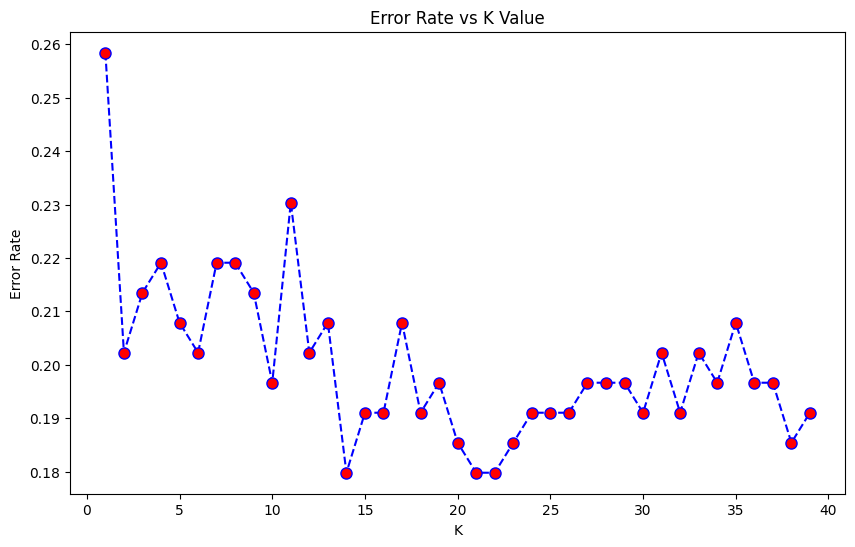

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), Error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Applying KNN

In [41]:
knn_23 = KNeighborsClassifier(n_neighbors = 23)
knn_23.fit(X_train, y_train)
y_pred_23 = knn_23.predict(X_test)

In [44]:
knn_14 = KNeighborsClassifier(n_neighbors = 14)
knn_14.fit(X_train, y_train)
y_pred_14 = knn_14.predict(X_test)

## Accuracy

In [46]:
accuracy = np.mean(y_pred_23 == y_test).round(2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.81


In [47]:
accuracy = np.mean(y_pred_14 == y_test).round(2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.82


# Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_14)
print(cm)

[[95 14]
 [18 51]]


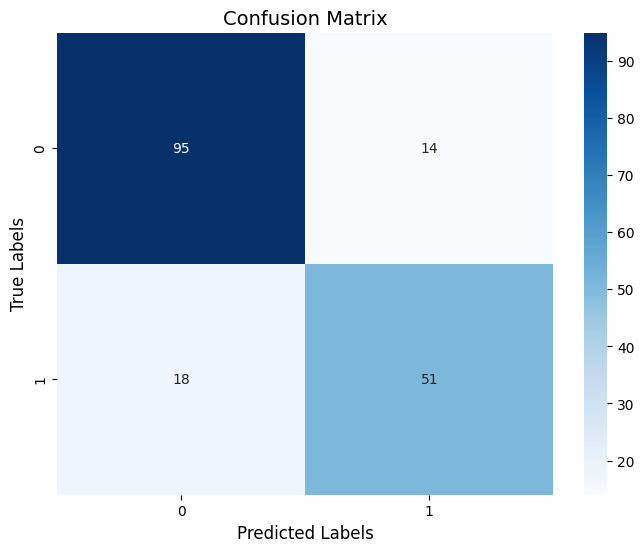

In [50]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()